C:\Users\chenz\AppData\Local\Temp\ipykernel_17736\98082222.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Users\chenz\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\chenz\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\chenz\AppData\Local\Temp\ipykernel_17736\98082222.py:27: FutureWarning: 

Passing `palette` without assigning

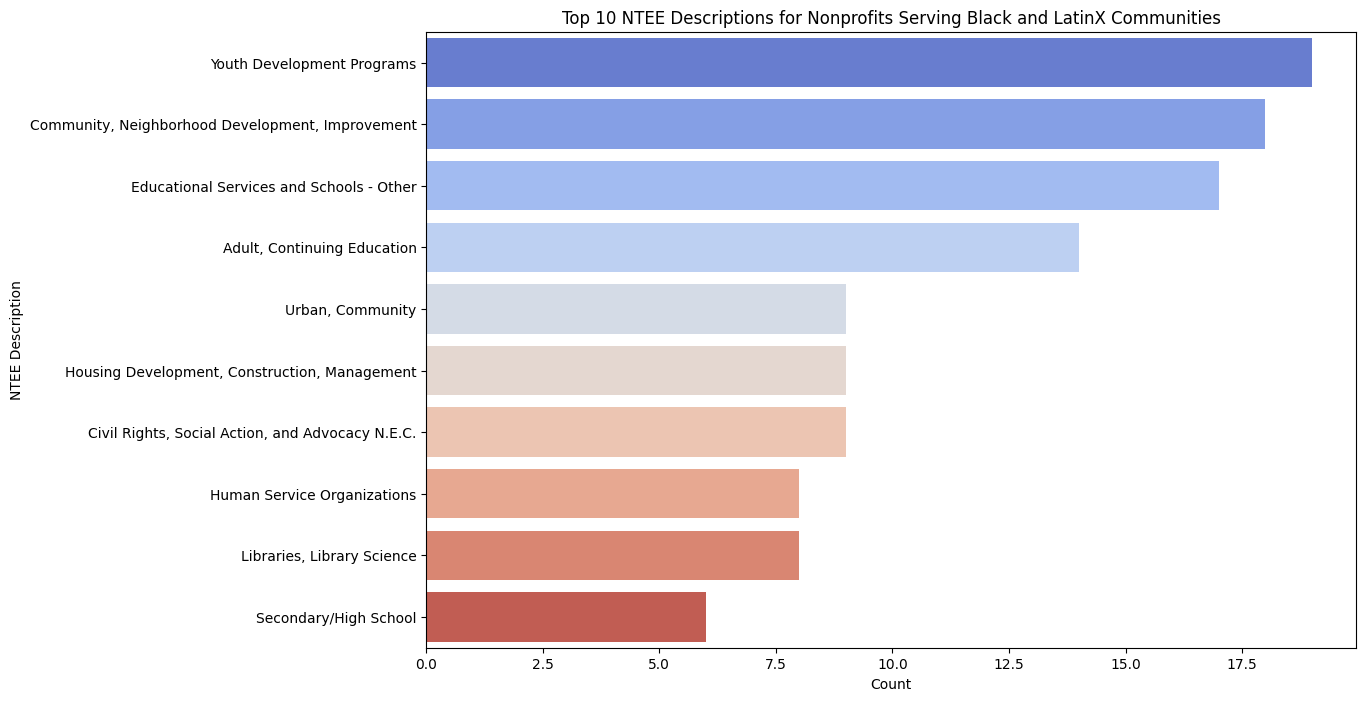

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Load the datasets
df_base_bundle = pd.read_excel('BU_Spark_20240117.xlsx', sheet_name='Base_bundle')
df_grants = pd.read_excel('BU_Spark_20240117.xlsx', sheet_name='Grants')
df_organizations = pd.read_excel('Demographics flat file_202401.xlsx', sheet_name='Organizations')

# Codes for populations
african_code, latin_american_code = 'PE030000', 'PE050000'

# Filtering the DataFrame for specific populations
filtered_orgs = df_base_bundle[(df_base_bundle['pcs_population'].str.contains(african_code, na=False)) |
                               (df_base_bundle['pcs_population'].str.contains(latin_american_code, na=False))]

filtered_grants = df_grants[(df_grants['recip_population_code'].str.contains(african_code, na=False)) |
                            (df_grants['recip_population_code'].str.contains(latin_american_code, na=False))]

# Visualizations:

# 1. Distribution of Nonprofits by NTEE Description
ntee_counts = filtered_orgs['ntee_description'].value_counts().reset_index()
ntee_counts.columns = ['NTEE Description', 'Count']
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='NTEE Description', data=ntee_counts.head(10), palette='coolwarm')
plt.title('Top 10 NTEE Descriptions for Nonprofits Serving Black and LatinX Communities')
plt.show()

In [ ]:
# 2. Total Funding Towards Black and LatinX Led Nonprofits in Massachusetts
racial_leaders = ['Black/African American', 'Hispanic/Latino/Latina/Latinx']
orgs_with_leaders = df_organizations[df_organizations['race_leader'].isin(racial_leaders)]
total_revenue = pd.merge(orgs_with_leaders, df_base_bundle, left_on='org_name', right_on='organization_name')['total_revenue'].sum()
print(f"Total funding towards Black and LatinX led nonprofits: ${total_revenue:,.0f}")

Total funding towards Black and LatinX led nonprofits: $6,995,565,469


In [ ]:
import pandas as pd

# Convert 'period_end' to datetime and extract the year
df_base_bundle['year'] = pd.to_datetime(df_base_bundle['period_end']).dt.year

# Merge the datasets
# Replace 'org_name' with the correct column from df_organizations if necessary
merged_df = pd.merge(df_grants, df_base_bundle, left_on='gm_ein', right_on='ein')
merged_df = pd.merge(merged_df, df_organizations, left_on='gm_name', right_on='org_name', how='inner')

# Filter for leaders who are Black or LatinX
black_latinx_leaders = ['Black/African American', 'Hispanic/Latino/Latina/Latinx']
filtered_df = merged_df[merged_df['race_leader'].isin(black_latinx_leaders)]

# Group by fiscal year and calculate total funding
# Assuming 'amount_usd' is the column that has the funding amount in df_grants
total_funding_per_year = filtered_df.groupby('fiscal_year')['amount_usd'].sum().reset_index()

print(total_funding_per_year)


   fiscal_year  amount_usd
0         2015     1946358
1         2019     1564500
2         2020     1353300
3         2021     8617500


In [ ]:
import pandas as pd

# Convert 'period_end' in df_base_bundle to datetime and extract the year
df_base_bundle['year'] = pd.to_datetime(df_base_bundle['period_end']).dt.year

# Merge the datasets
merged_df = pd.merge(df_grants, df_base_bundle, left_on='gm_ein', right_on='ein', how='inner')
merged_df = pd.merge(merged_df, df_organizations, left_on='gm_name', right_on='org_name', how='inner')

# Filter for leaders who are Black or LatinX
black_latinx_leaders = ['Black/African American', 'Hispanic/Latino/Latina/Latinx']
filtered_df = merged_df[merged_df['race_leader'].isin(black_latinx_leaders)]

# Filter for years 2019 to 2021 before grouping
filtered_df = filtered_df[filtered_df['fiscal_year'].isin([2019, 2020, 2021])]

# Group by fiscal year and calculate total funding
# Assuming 'amount_usd' is the column that has the funding amount in df_grants
total_funding_per_year = filtered_df.groupby('fiscal_year')['amount_usd'].sum().reset_index()

print(total_funding_per_year)

   fiscal_year  amount_usd
0         2019     1564500
1         2020     1353300
2         2021     8617500


C:\Users\chenz\AppData\Local\Temp\ipykernel_17736\1265968546.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='race_leader', y='total_revenue', data=race_revenue, palette='Set2')


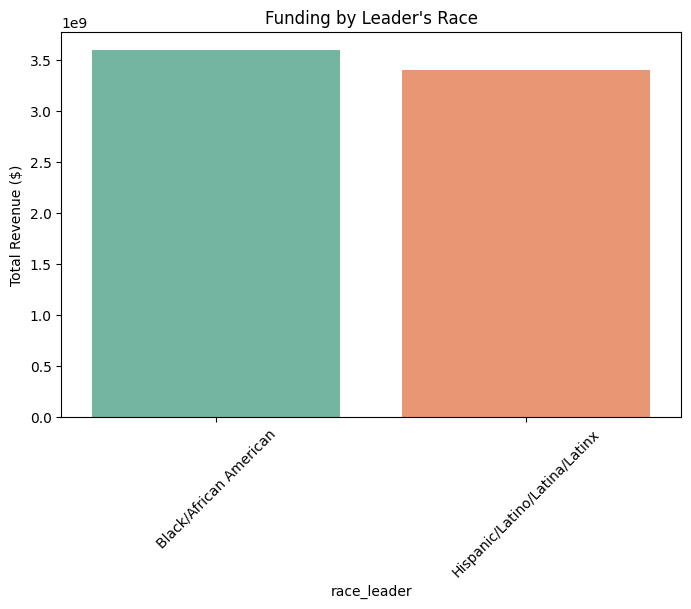

In [ ]:
# 3. Comparison of Funding by Leader's Race
merged_data = pd.merge(orgs_with_leaders, df_base_bundle, left_on='org_name', right_on='organization_name', how='left')
# Ensure 'total_revenue' is a numeric column for accurate summation
merged_data['total_revenue'] = pd.to_numeric(merged_data['total_revenue'], errors='coerce')
# Aggregate 'total_revenue' by 'race_leader'
race_revenue = merged_data.groupby('race_leader')['total_revenue'].sum().reset_index()

# Plot the results
plt.figure(figsize=(8, 5))
sns.barplot(x='race_leader', y='total_revenue', data=race_revenue, palette='Set2')
plt.title('Funding by Leader\'s Race')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.show()

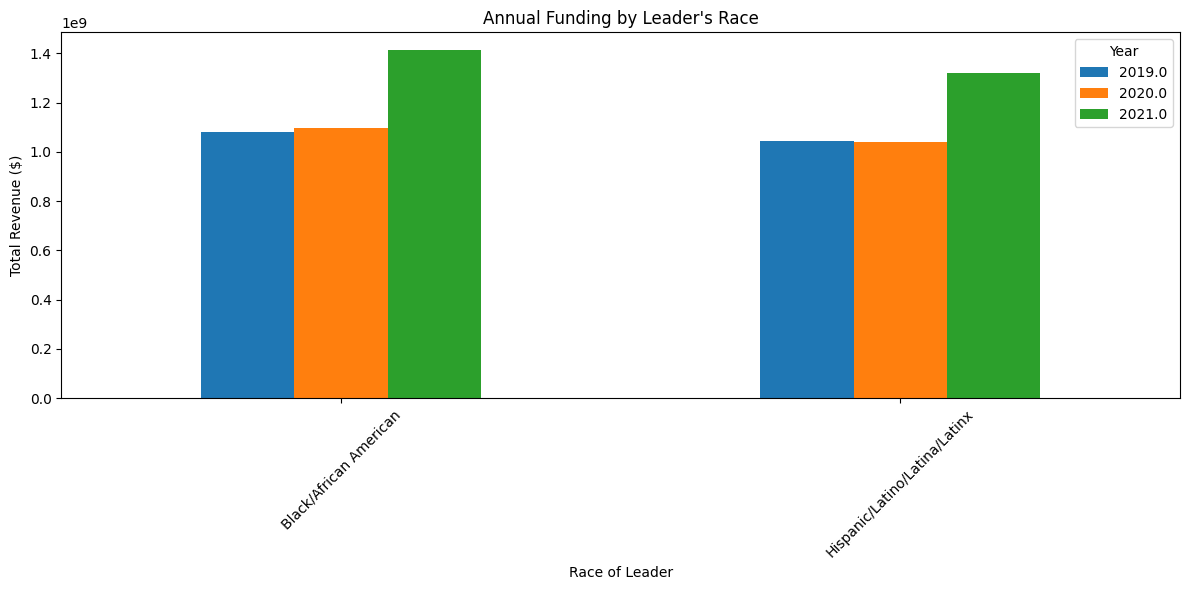

In [ ]:
# Add 'year' column to the df_base_bundle
df_base_bundle['year'] = pd.to_datetime(df_base_bundle['period_end']).dt.year

# Merge the datasets including the year
merged_data = pd.merge(orgs_with_leaders, df_base_bundle, left_on='org_name', right_on='organization_name', how='left')

# Convert 'total_revenue' to numeric for accurate summation
merged_data['total_revenue'] = pd.to_numeric(merged_data['total_revenue'], errors='coerce')

# Group by both 'race_leader' and 'year' to get annual total revenue by leader's race
annual_race_revenue = merged_data.groupby(['race_leader', 'year'])['total_revenue'].sum().reset_index()

# Pivot the data to have years as columns and race_leader as rows
pivot_data = annual_race_revenue.pivot(index='race_leader', columns='year', values='total_revenue')

# Plot the results
pivot_data.plot(kind='bar', figsize=(12, 6))
plt.title('Annual Funding by Leader\'s Race')
plt.ylabel('Total Revenue ($)')
plt.xlabel('Race of Leader')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Unique years in df_base_bundle: [2020 2019 2021]
Filtered years in df_base_bundle: [2020 2019 2021]
Merged data sample:    Unnamed: 0                                           org_name     city_x  \
0  01-0851252  Prospect Hill Academy Charter School Foundatio...  Cambridge   
1  01-0851252  Prospect Hill Academy Charter School Foundatio...  Cambridge   
2  01-0851252  Prospect Hill Academy Charter School Foundatio...  Cambridge   
3  02-0539062                 Building Bridges Through Music Inc       Lynn   
4  02-0539062                 Building Bridges Through Music Inc       Lynn   

  state_code_x    dei_last_updated             race_leader gender1_leader  \
0           MA 2021-12-09 13:48:31  Black/African American         Female   
1           MA 2021-12-09 13:48:31  Black/African American         Female   
2           MA 2021-12-09 13:48:31  Black/African American         Female   
3           MA 2023-11-09 00:00:00  Black/African American         Female   
4           MA 2023-

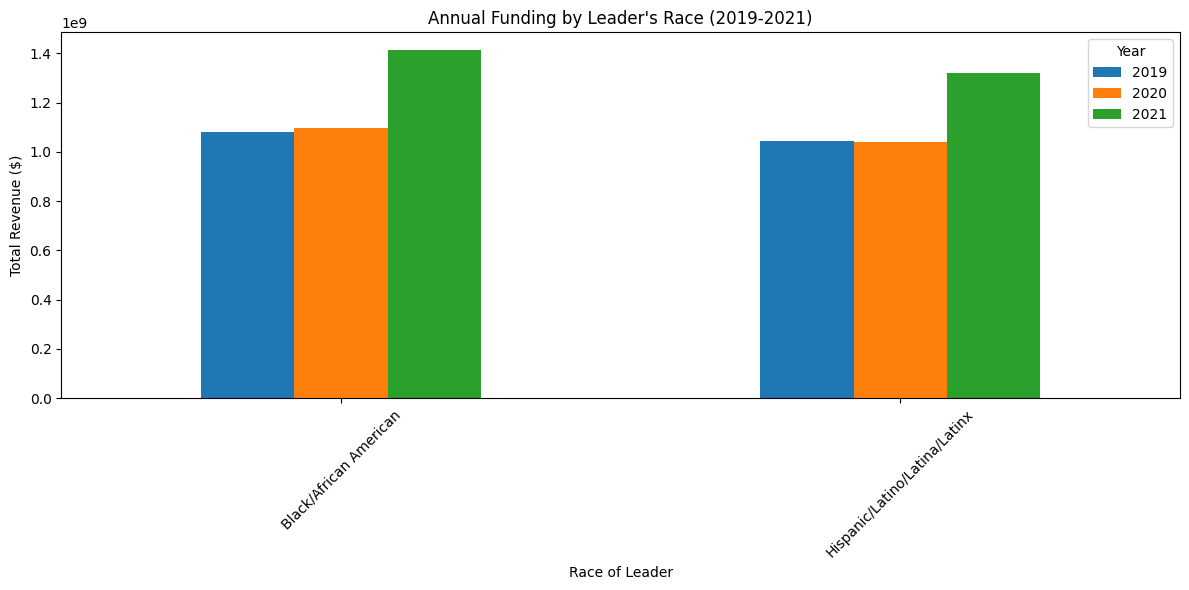

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_base_bundle and orgs_with_leaders have been loaded correctly

# Convert 'period_end' to datetime and extract the year
df_base_bundle['year'] = pd.to_datetime(df_base_bundle['period_end'], errors='coerce').dt.year

# Check the unique years in the dataset
print("Unique years in df_base_bundle:", df_base_bundle['year'].unique())

# Filter for the years of interest
df_base_bundle_filtered = df_base_bundle[df_base_bundle['year'].isin([2019, 2020, 2021])]
print("Filtered years in df_base_bundle:", df_base_bundle_filtered['year'].unique())

# Merge the datasets on the organization name
# Make sure 'org_name' and 'organization_name' are present in both dataframes and have matching entries
merged_data = pd.merge(orgs_with_leaders, df_base_bundle_filtered, left_on='org_name', right_on='organization_name', how='inner')

# Check the first few rows of the merged data
print("Merged data sample:", merged_data.head())

# Ensure 'total_revenue' is a numeric column for accurate summation
merged_data['total_revenue'] = pd.to_numeric(merged_data['total_revenue'], errors='coerce')

# Group by 'race_leader' and 'year' to get annual total revenue by leader's race
annual_race_revenue = merged_data.groupby(['race_leader', 'year'])['total_revenue'].sum().reset_index()

# Check the grouped data
print("Annual race revenue:", annual_race_revenue)

# Pivot the data to have years as columns and race_leader as rows
pivot_data = annual_race_revenue.pivot(index='race_leader', columns='year', values='total_revenue')

# Check the pivot data
print("Pivot data:", pivot_data)

# Plot the results
pivot_data.plot(kind='bar', figsize=(12, 6))
plt.title('Annual Funding by Leader\'s Race (2019-2021)')
plt.ylabel('Total Revenue ($)')
plt.xlabel('Race of Leader')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

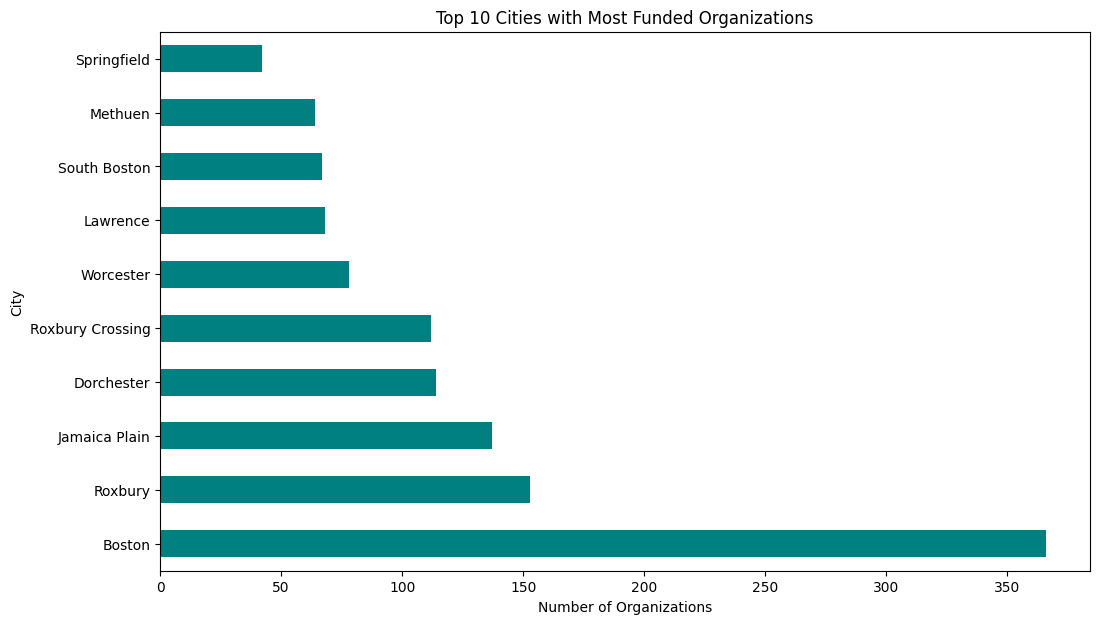

In [ ]:
# 4. Number of Organizations Funded by City
city_counts = filtered_grants['recip_city'].value_counts().head(10)
plt.figure(figsize=(12, 7))
city_counts.plot(kind='barh', color='teal')
plt.title('Top 10 Cities with Most Funded Organizations')
plt.xlabel('Number of Organizations')
plt.ylabel('City')
plt.show()

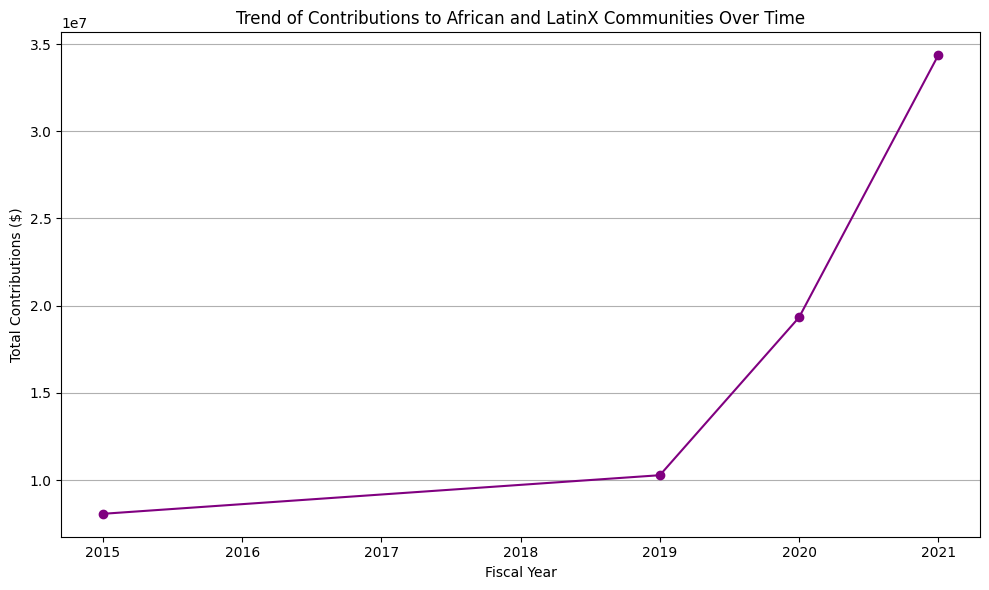

In [ ]:
# 5. Trend of Contributions Over Time
yearly_contrib = filtered_grants.groupby('fiscal_year')['amount_usd'].sum()
plt.figure(figsize=(10, 6))
yearly_contrib.plot(marker='o', linestyle='-', color='purple')
plt.title('Trend of Contributions to African and LatinX Communities Over Time')
plt.ylabel('Total Contributions ($)')
plt.xlabel('Fiscal Year')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

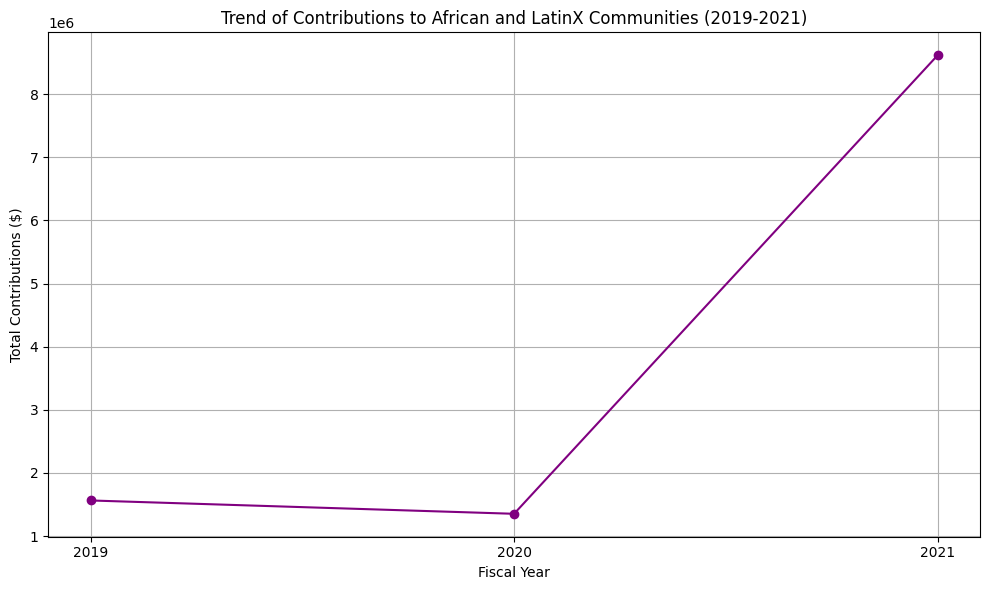

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'period_end' to datetime and extract the year in df_base_bundle
df_base_bundle['year'] = pd.to_datetime(df_base_bundle['period_end']).dt.year

# Merge the datasets on appropriate keys, ensuring that the EINs and organization names match
# Note: You may need to adjust the 'on' parameters if they are incorrect.
merged_df = pd.merge(df_grants, df_base_bundle, left_on='gm_ein', right_on='ein', how='inner')
merged_df = pd.merge(merged_df, df_organizations, left_on='gm_name', right_on='org_name', how='inner')

# Filter for leaders who are Black or LatinX and for the years 2019 to 2021
black_latinx_leaders = ['Black/African American', 'Hispanic/Latino/Latina/Latinx']
filtered_df = merged_df[
    (merged_df['race_leader'].isin(black_latinx_leaders)) &
    (merged_df['fiscal_year'].isin([2019, 2020, 2021]))
]

# Assuming 'amount_usd' correctly represents the funding amount in df_grants
total_funding_per_year = filtered_df.groupby('fiscal_year')['amount_usd'].sum().reset_index()

# Now let's plot the chart with the correct total funding per year.
plt.figure(figsize=(10, 6))
plt.plot(total_funding_per_year['fiscal_year'], total_funding_per_year['amount_usd'], marker='o', linestyle='-', color='purple')
plt.title('Trend of Contributions to African and LatinX Communities (2019-2021)')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Contributions ($)')
plt.grid(True)
plt.xticks(total_funding_per_year['fiscal_year'])  # Ensure only the specific years are marked
plt.tight_layout()
plt.show()

C:\Users\chenz\AppData\Local\Temp\ipykernel_17736\3698249718.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y='ntee_description', data=sector_funding_sorted, palette='viridis')


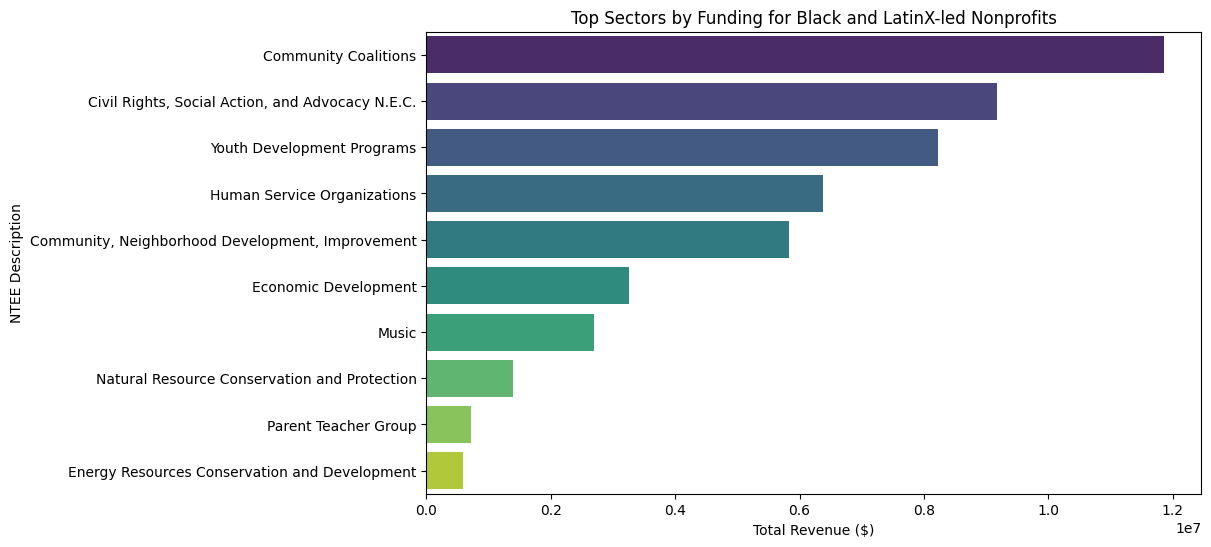

In [ ]:
#Deeper Questions
#How does the funding towards Black and LatinX-led nonprofits compare across different sectors (based on NTEE descriptions)?
#This question aims to understand if certain sectors (like education, health, arts, etc.) receive more funding than others when it comes to nonprofits led by Black and LatinX individuals.

# Merge the organizations led by Black and LatinX individuals with their total revenue
orgs_revenue_by_sector = pd.merge(orgs_with_leaders, filtered_orgs, left_on='org_name', right_on='organization_name')

# Group by NTEE Description to get total revenue by sector
sector_funding = orgs_revenue_by_sector.groupby('ntee_description')['total_revenue'].sum().reset_index()

# Sort by total revenue in descending order to get top sectors
sector_funding_sorted = sector_funding.sort_values(by='total_revenue', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='total_revenue', y='ntee_description', data=sector_funding_sorted, palette='viridis')
plt.title('Top Sectors by Funding for Black and LatinX-led Nonprofits')
plt.xlabel('Total Revenue ($)')
plt.ylabel('NTEE Description')
plt.show()

<Figure size 1200x800 with 0 Axes>

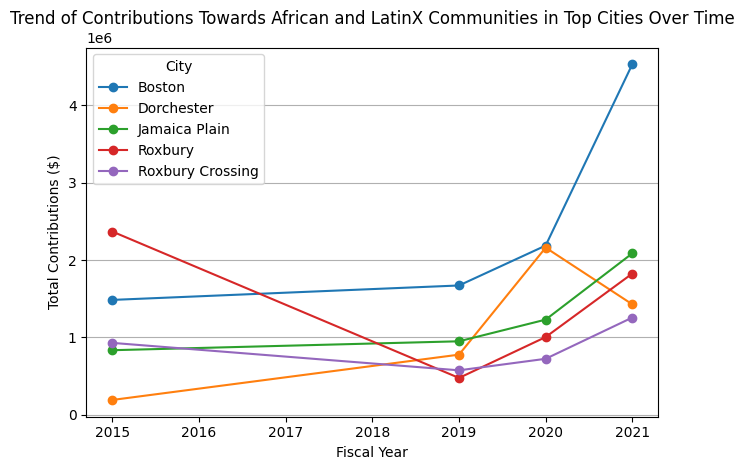

In [ ]:
#What is the trend of contributions towards Black and LatinX communities in the top cities with the most funded organizations over time?
#This question looks into whether the contributions towards these communities have increased or decreased over time in the cities with the most funded organizations, offering insight into the geographic focus of funding efforts.

top_cities = city_counts.head(5).index.tolist()

# Filter grants for top cities and group by fiscal year and city
top_city_trends = filtered_grants[filtered_grants['recip_city'].isin(top_cities)].groupby(['fiscal_year', 'recip_city'])['amount_usd'].sum().unstack()

plt.figure(figsize=(12, 8))
top_city_trends.plot(marker='o', linestyle='-')
plt.title('Trend of Contributions Towards African and LatinX Communities in Top Cities Over Time')
plt.ylabel('Total Contributions ($)')
plt.xlabel('Fiscal Year')
plt.legend(title='City')
plt.grid(axis='y')
plt.tight_layout()
plt.show()